## 🏁 Greyhound Race Result Prediction

Given *data about greyhound racing in the UK*, let's try to predict the **winner** and **placements** of greyhounds in a given race.

We will use various classification models to make our predictions.

Data source: https://www.kaggle.com/datasets/davidregan/greyhound-racing-uk-predict-finish-position

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_final.csv')
data

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,Finish_Recent,Odds_Recent,Early_Recent,Races_380,Wins_380,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
0,0,6,2.75,4.00,1,12,456.47,4.09,402.86,17,494.29,3.38,4.42,2.46,4,0.500000,2.500000,4.38000,2.000000,4.00,17.84,3.63,0.500000,6.0,4,0.000000,-10.50000,0
1,0,3,5.00,7.60,4,5,410.48,3.53,414.00,21,380.00,3.71,4.04,3.43,10,0.200000,3.710000,4.04000,3.430000,3.29,24.18,3.70,0.280000,6.0,1,0.140000,-4.71000,1
2,0,5,5.00,9.40,6,9,386.45,3.39,380.00,31,380.00,3.00,4.46,3.43,25,0.200000,3.000000,4.46000,3.430000,3.71,24.06,3.67,-0.430000,6.0,3,0.000000,-2.86000,0
3,0,4,7.00,7.80,5,9,380.00,3.03,380.00,21,380.00,2.71,5.46,2.43,16,0.250000,2.710000,5.46000,2.430000,4.43,24.14,3.65,0.280000,6.0,2,0.000000,-2.71000,0
4,0,2,5.00,5.10,2,13,385.00,2.59,388.33,40,380.00,2.71,4.18,3.14,30,0.330000,2.710000,4.18000,3.140000,2.71,24.05,3.64,-0.430000,6.0,6,0.000000,-2.32000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,2000,4,3.50,4.67,3,4,408.19,3.25,383.91,52,380.00,3.23,5.42,4.62,35,0.110000,3.000000,5.36000,5.000000,5.71,24.13,3.75,-2.000000,1.0,4,0.000000,-3.50000,0
12002,2000,2,7.00,9.36,6,8,418.62,3.82,412.00,58,425.71,6.30,6.55,6.04,37,0.140000,4.710000,6.43000,5.000000,4.86,20.81,3.73,-0.290000,1.0,3,0.000000,-12.43000,0
12003,2000,5,5.00,4.35,2,7,400.00,4.05,410.00,9,380.00,3.82,8.00,4.73,4,0.000000,4.000000,8.00000,4.750000,6.00,24.36,3.74,-0.750000,1.0,6,0.000000,-4.75000,0
12004,2000,1,4.00,3.86,1,3,436.36,4.82,442.00,22,457.14,4.34,6.75,4.14,0,0.182501,3.430684,5.29702,3.487433,5.71,24.13,3.74,-0.056749,1.0,2,0.068085,-4.48688,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12006 entries, 0 to 12005
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Race_ID              12006 non-null  int64  
 1   Trap                 12006 non-null  int64  
 2   Odds                 12006 non-null  float64
 3   BSP                  12006 non-null  float64
 4   Public_Estimate      12006 non-null  int64  
 5   Last_Run             12006 non-null  int64  
 6   Distance_All         12006 non-null  float64
 7   Finish_All           12006 non-null  float64
 8   Distance_Places_All  12006 non-null  float64
 9   Races_All            12006 non-null  int64  
 10  Distance_Recent      12006 non-null  float64
 11  Finish_Recent        12006 non-null  float64
 12  Odds_Recent          12006 non-null  float64
 13  Early_Recent         12006 non-null  float64
 14  Races_380            12006 non-null  int64  
 15  Wins_380             12006 non-null 

In [4]:
data.isna().sum().sum()

0

### Basic EDA

In [5]:
data.describe()

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,Finish_Recent,Odds_Recent,Early_Recent,Races_380,Wins_380,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
count,12006.00000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000
mean,1000.00000,3.500000,5.371940,7.600623,3.501916,7.149592,400.232647,3.666011,399.435106,62.054223,394.522238,3.613933,5.355872,3.608929,41.426287,0.182518,3.429541,5.298725,3.488412,5.703423,24.042455,3.703312,-0.058871,3.442533,3.499500,0.068360,-4.473741,0.166667
std,577.66293,1.707896,2.208432,4.255454,1.706236,3.346557,28.816968,0.527866,28.957759,56.200429,32.899091,0.860507,1.375506,1.099211,47.747793,0.120820,0.754347,1.265712,1.008654,1.797255,1.290984,0.061315,1.089164,1.744878,1.708042,0.152352,3.036172,0.372694
min,0.00000,1.000000,1.670000,1.830000,1.000000,2.000000,306.670000,1.830000,307.570000,2.000000,303.000000,1.290000,1.500000,1.000000,0.000000,0.000000,1.000000,1.800000,1.000000,1.000000,0.000000,3.500000,-5.000000,1.000000,1.000000,0.000000,-50.000000,0.000000
25%,500.00000,2.000000,4.000000,4.610000,2.000000,5.000000,380.000000,3.320000,380.000000,23.000000,380.000000,3.000000,4.460000,2.860000,10.000000,0.120000,3.000000,4.460000,2.710000,4.500000,24.120000,3.660000,-0.800000,2.000000,2.000000,0.000000,-5.430000,0.000000
50%,1000.00000,3.500000,5.000000,6.400000,4.000000,7.000000,389.520000,3.610000,388.000000,44.000000,380.000000,3.570000,5.170000,3.570000,24.000000,0.180000,3.430000,5.140000,3.487433,6.000000,24.310000,3.700000,0.000000,3.000000,3.000000,0.000000,-4.000000,0.000000
75%,1500.00000,5.000000,6.000000,9.290000,5.000000,8.000000,413.995000,3.920000,412.967500,84.000000,382.322500,4.120000,6.000000,4.290000,56.000000,0.230000,3.860000,5.960000,4.140000,7.290000,24.510000,3.740000,0.710000,5.000000,5.000000,0.068085,-2.750000,0.000000
max,2000.00000,6.000000,21.000000,44.000000,6.000000,28.000000,573.160000,7.270000,579.550000,462.000000,614.570000,12.350000,16.640000,10.500000,441.000000,1.000000,6.000000,17.330000,6.000000,8.000000,25.660000,4.210000,5.000000,6.000000,6.000000,1.000000,11.000000,1.000000


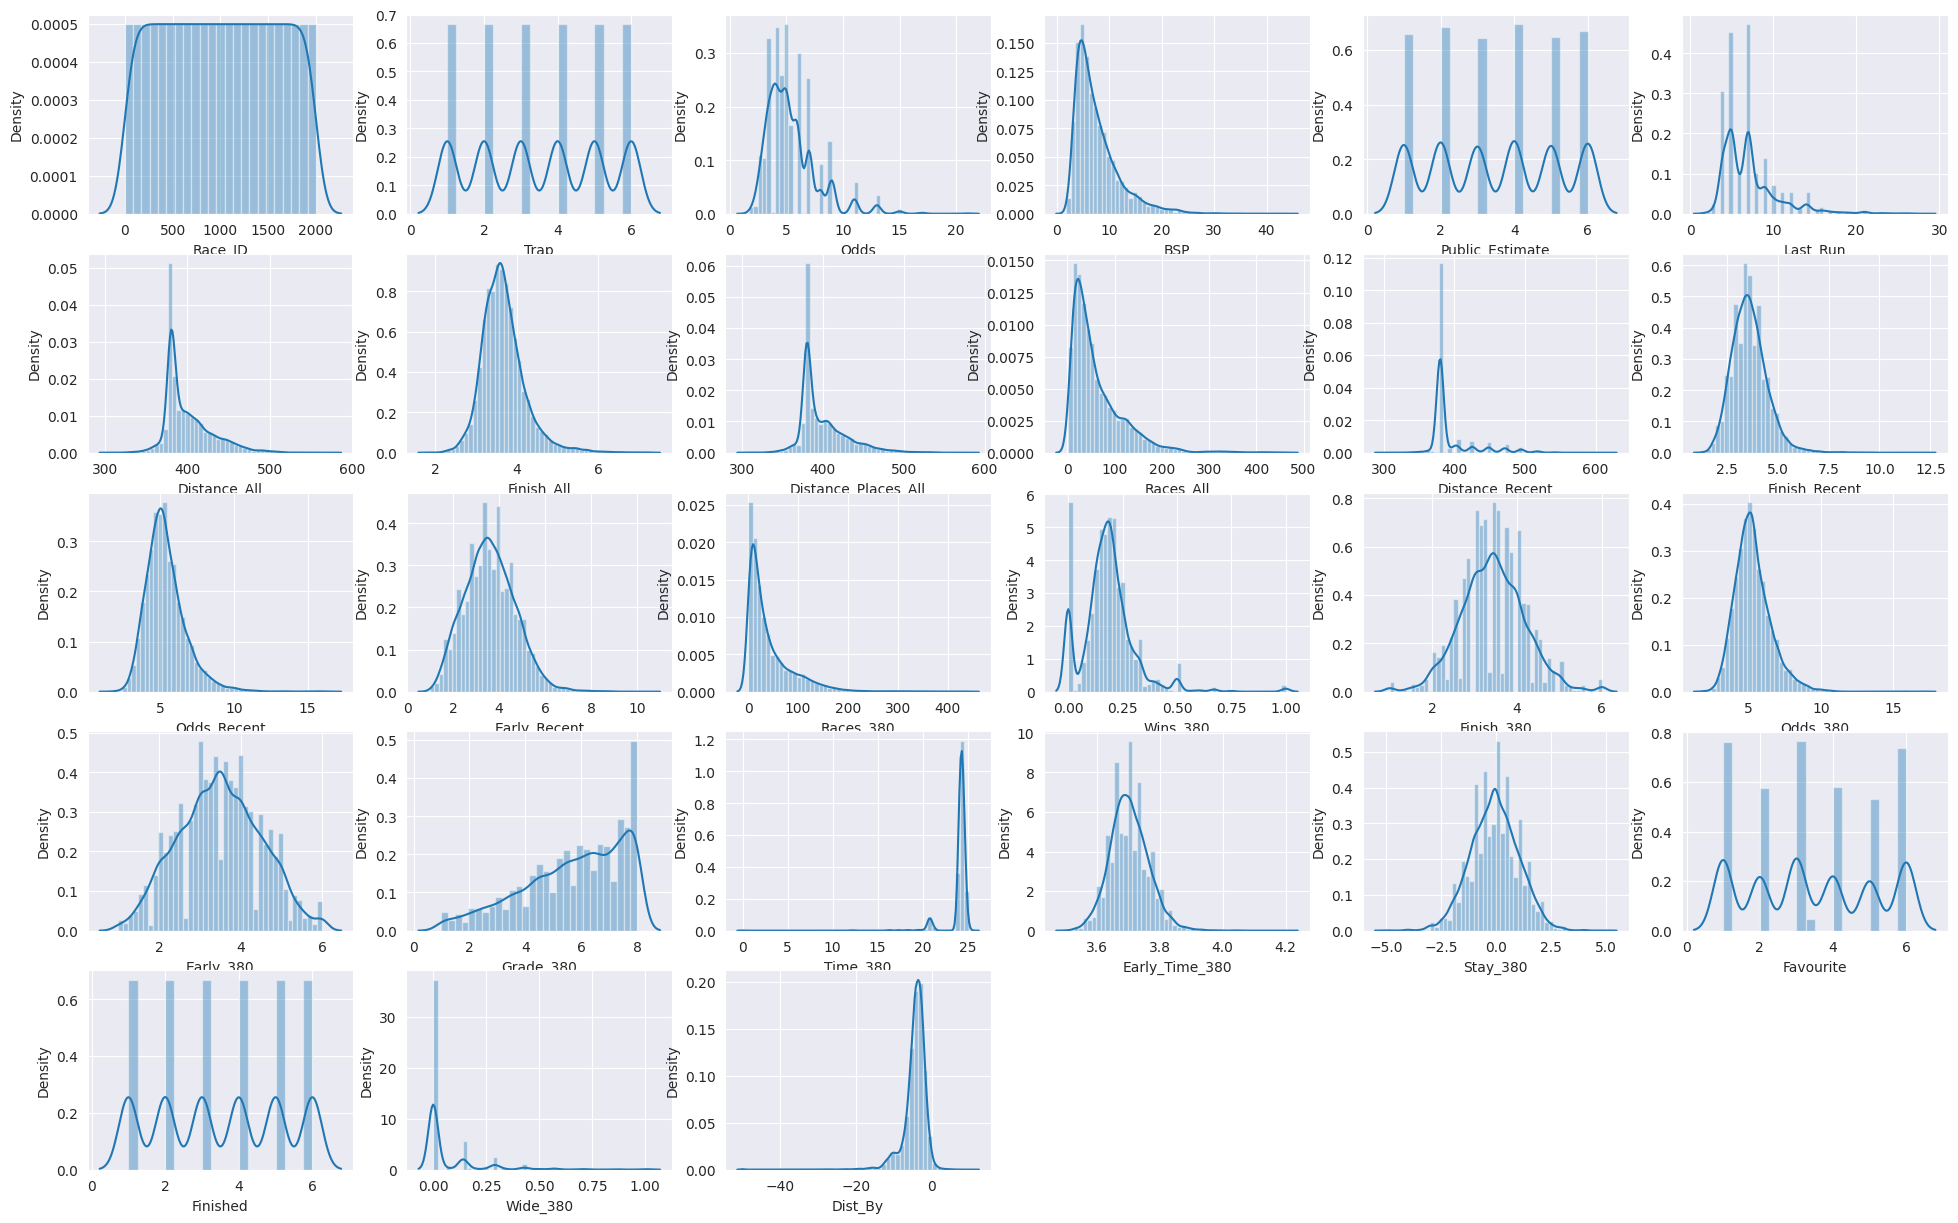

In [6]:
non_binary_columns = [column for column in data.columns if len(data[column].unique()) > 2]

plt.figure(figsize=(24, 15))

for i in range(len(non_binary_columns)):
    plt.subplot(5, 6, i+1)
    sns.distplot(data[non_binary_columns[i]])
plt.show()

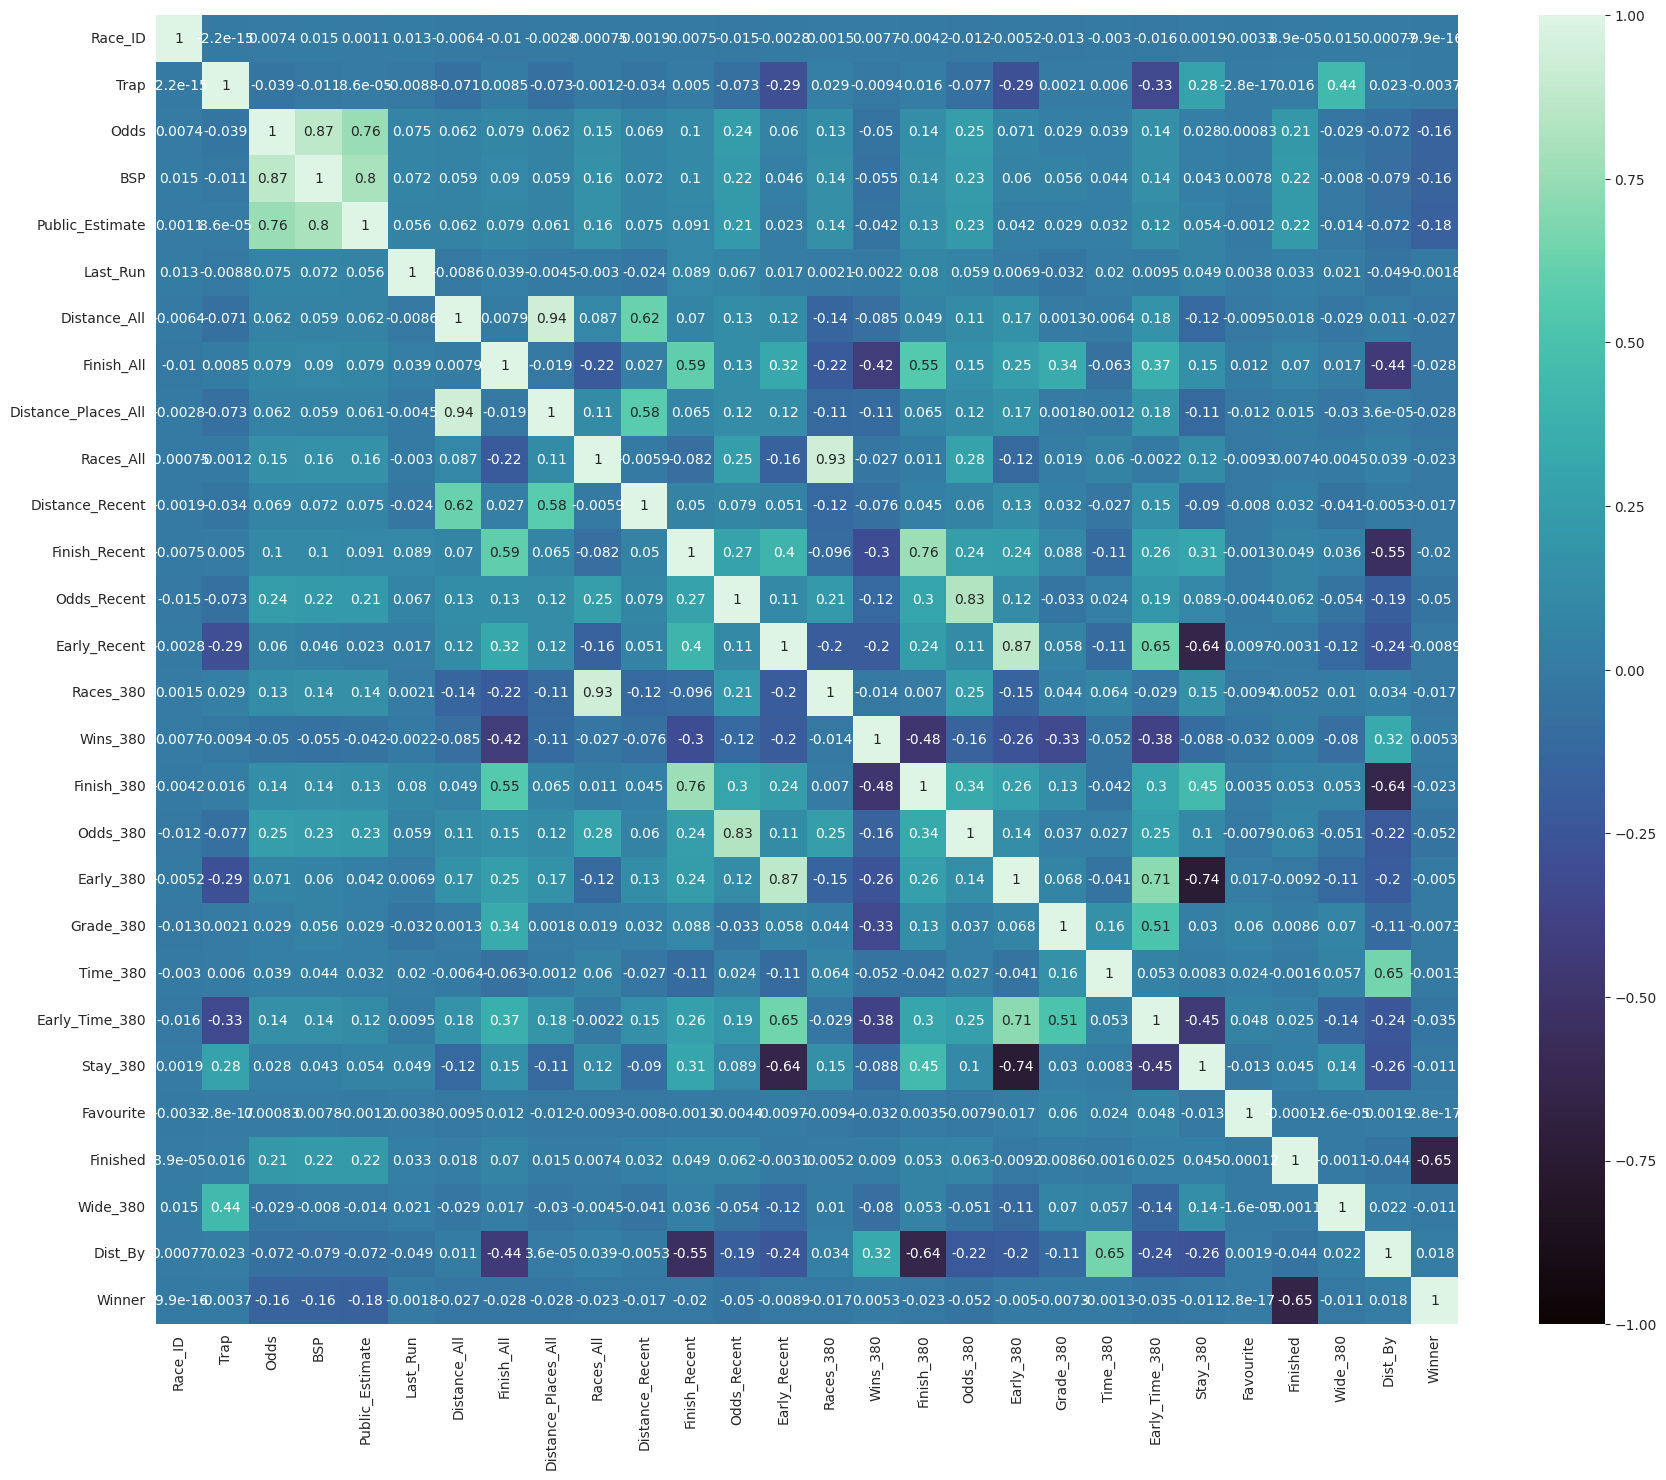

In [7]:
corr = data.corr()

plt.figure(figsize=(21, 17))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

### Preprocessing

In [8]:
data

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,Finish_Recent,Odds_Recent,Early_Recent,Races_380,Wins_380,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Finished,Wide_380,Dist_By,Winner
0,0,6,2.75,4.00,1,12,456.47,4.09,402.86,17,494.29,3.38,4.42,2.46,4,0.500000,2.500000,4.38000,2.000000,4.00,17.84,3.63,0.500000,6.0,4,0.000000,-10.50000,0
1,0,3,5.00,7.60,4,5,410.48,3.53,414.00,21,380.00,3.71,4.04,3.43,10,0.200000,3.710000,4.04000,3.430000,3.29,24.18,3.70,0.280000,6.0,1,0.140000,-4.71000,1
2,0,5,5.00,9.40,6,9,386.45,3.39,380.00,31,380.00,3.00,4.46,3.43,25,0.200000,3.000000,4.46000,3.430000,3.71,24.06,3.67,-0.430000,6.0,3,0.000000,-2.86000,0
3,0,4,7.00,7.80,5,9,380.00,3.03,380.00,21,380.00,2.71,5.46,2.43,16,0.250000,2.710000,5.46000,2.430000,4.43,24.14,3.65,0.280000,6.0,2,0.000000,-2.71000,0
4,0,2,5.00,5.10,2,13,385.00,2.59,388.33,40,380.00,2.71,4.18,3.14,30,0.330000,2.710000,4.18000,3.140000,2.71,24.05,3.64,-0.430000,6.0,6,0.000000,-2.32000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,2000,4,3.50,4.67,3,4,408.19,3.25,383.91,52,380.00,3.23,5.42,4.62,35,0.110000,3.000000,5.36000,5.000000,5.71,24.13,3.75,-2.000000,1.0,4,0.000000,-3.50000,0
12002,2000,2,7.00,9.36,6,8,418.62,3.82,412.00,58,425.71,6.30,6.55,6.04,37,0.140000,4.710000,6.43000,5.000000,4.86,20.81,3.73,-0.290000,1.0,3,0.000000,-12.43000,0
12003,2000,5,5.00,4.35,2,7,400.00,4.05,410.00,9,380.00,3.82,8.00,4.73,4,0.000000,4.000000,8.00000,4.750000,6.00,24.36,3.74,-0.750000,1.0,6,0.000000,-4.75000,0
12004,2000,1,4.00,3.86,1,3,436.36,4.82,442.00,22,457.14,4.34,6.75,4.14,0,0.182501,3.430684,5.29702,3.487433,5.71,24.13,3.74,-0.056749,1.0,2,0.068085,-4.48688,0


In [9]:
# Drop Race_ID column
data = data.drop('Race_ID', axis=1)

### Training (Winner Prediction)

In [10]:
# Split df into X and y ("Winner" is the target column)
df = data.copy()
df = df.drop('Finished', axis=1)
y = df['Winner']
X = df.drop('Winner', axis=1)

In [11]:
X

,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,Finish_Recent,Odds_Recent,Early_Recent,Races_380,Wins_380,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Wide_380,Dist_By
0,6,2.75,4.00,1,12,456.47,4.09,402.86,17,494.29,3.38,4.42,2.46,4,0.500000,2.500000,4.38000,2.000000,4.00,17.84,3.63,0.500000,6.0,0.000000,-10.50000
1,3,5.00,7.60,4,5,410.48,3.53,414.00,21,380.00,3.71,4.04,3.43,10,0.200000,3.710000,4.04000,3.430000,3.29,24.18,3.70,0.280000,6.0,0.140000,-4.71000
2,5,5.00,9.40,6,9,386.45,3.39,380.00,31,380.00,3.00,4.46,3.43,25,0.200000,3.000000,4.46000,3.430000,3.71,24.06,3.67,-0.430000,6.0,0.000000,-2.86000
3,4,7.00,7.80,5,9,380.00,3.03,380.00,21,380.00,2.71,5.46,2.43,16,0.250000,2.710000,5.46000,2.430000,4.43,24.14,3.65,0.280000,6.0,0.000000,-2.71000
4,2,5.00,5.10,2,13,385.00,2.59,388.33,40,380.00,2.71,4.18,3.14,30,0.330000,2.710000,4.18000,3.140000,2.71,24.05,3.64,-0.430000,6.0,0.000000,-2.32000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,4,3.50,4.67,3,4,408.19,3.25,383.91,52,380.00,3.23,5.42,4.62,35,0.110000,3.000000,5.36000,5.000000,5.71,24.13,3.75,-2.000000,1.0,0.000000,-3.50000
12002,2,7.00,9.36,6,8,418.62,3.82,412.00,58,425.71,6.30,6.55,6.04,37,0.140000,4.710000,6.43000,5.000000,4.86,20.81,3.73,-0.290000,1.0,0.000000,-12.43000
12003,5,5.00,4.35,2,7,400.00,4.05,410.00,9,380.00,3.82,8.00,4.73,4,0.000000,4.000000,8.00000,4.750000,6.00,24.36,3.74,-0.750000,1.0,0.000000,-4.75000
12004,1,4.00,3.86,1,3,436.36,4.82,442.00,22,457.14,4.34,6.75,4.14,0,0.182501,3.430684,5.29702,3.487433,5.71,24.13,3.74,-0.056749,1.0,0.068085,-4.48688


In [12]:
y

0        0
1        1
2        0
3        0
4        0
        ..
12001    0
12002    0
12003    0
12004    0
12005    0
Name: Winner, Length: 12006, dtype: int64

In [13]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [14]:
X_train.shape, X_test.shape

((8404, 25), (3602, 25))

In [15]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [16]:
X_train

,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,Distance_Recent,Finish_Recent,Odds_Recent,Early_Recent,Races_380,Wins_380,Finish_380,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Wide_380,Dist_By
0,-1.463444,0.729747,0.608547,0.876935,0.251297,-0.014678,-0.553846,0.128510,0.688502,-0.443932,0.101539,0.420045,0.737548,0.602405,-0.430699,0.358252,0.496273,0.920042,-0.883066,0.107880,0.419345,-0.604186,-0.246080,-0.449789,0.296794
1,-0.876138,0.054034,0.223266,0.876935,-0.653158,1.068350,0.201458,0.428269,-0.163528,-0.443932,-0.823587,-1.283592,-0.326530,-0.765334,-1.508114,-0.577471,-1.340962,-0.297346,-0.515164,0.184170,-0.558506,-0.126526,-1.389314,-0.449789,0.234845
2,-0.288831,0.054034,0.362524,0.291243,-0.954643,-0.585881,0.050397,-0.678558,-0.589543,-0.443932,-1.540560,-0.545106,-0.299246,-0.386576,-0.762211,-1.513194,-0.544564,-0.208269,1.190561,0.176541,0.093395,-0.861387,0.897154,-0.449789,0.821729
3,-0.288831,-0.171203,-0.426607,0.291243,-0.351673,-0.600465,-0.157312,-0.551817,-0.589543,-0.443932,-0.060358,-0.523170,1.519690,-0.491786,-0.099187,0.173744,-0.520909,1.771224,0.393441,0.275717,1.071246,-1.522762,-1.389314,-0.449789,0.075082
4,-1.463444,0.279272,1.088988,1.462627,-0.050188,-0.675815,-0.648259,-0.678558,0.954762,-0.443932,-1.216766,-0.208765,-1.863530,1.402007,-0.264943,-1.144176,-0.181848,-1.910632,1.190561,0.458812,-0.558506,0.975765,-0.817697,-0.449789,0.264189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8399,0.298475,-0.621678,-0.770110,-1.465833,1.457238,-0.588311,1.051175,-0.466172,0.315739,-0.443932,0.147796,-0.837576,0.391950,0.518237,-0.016309,0.410969,-0.859969,0.543938,0.711174,-2.333381,0.256370,-0.218384,0.325537,-0.449789,-1.995315
8400,-0.876138,-0.846916,-0.751543,-0.880141,-0.351673,2.186796,-0.988146,1.993366,0.333490,-0.092556,-0.962356,0.778321,-0.372003,-0.828461,2.635789,-1.895391,2.128494,-0.990168,-0.961105,-0.250680,-0.232556,-0.402099,-0.246080,-0.449789,1.310799
8401,-0.288831,-0.621678,-0.679592,-1.465833,-0.050188,-0.673037,-1.460211,-0.333214,-0.784800,-0.443932,-1.540560,-0.545106,-0.435666,-0.618039,1.972764,-1.513194,-0.544564,-0.356731,-1.440492,-0.044698,-0.558506,-0.723601,-0.246080,-0.449789,1.379269
8402,-1.463444,0.279272,0.056156,1.462627,0.854268,0.881537,-0.232842,0.522548,-0.234531,0.961266,-0.060358,0.441980,0.992199,-0.260323,0.232325,-0.761980,0.267604,0.355887,-1.278839,0.001075,-0.069581,-0.861387,0.325537,-0.449789,0.821729


In [17]:
models = {
    "   K-Nearest Neighbors": KNeighborsClassifier(),
    "   Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
    "        Neural Network": MLPClassifier()
}

In [18]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

   K-Nearest Neighbors trained.
   Logistic Regression trained.
Support Vector Machine trained.
         Decision Tree trained.
        Neural Network trained.


In [19]:
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

   K-Nearest Neighbors Accuracy: 80.43%
   Logistic Regression Accuracy: 83.51%
Support Vector Machine Accuracy: 83.51%
         Decision Tree Accuracy: 71.82%
        Neural Network Accuracy: 82.04%


### Training (Place Prediction)

In [20]:
# Split df into X and y ("Finished" is the target column)
df = data.copy()
df = df.drop('Winner', axis=1)
y = df['Finished']
X = df.drop('Finished', axis=1)

In [21]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [22]:
X_train.shape, X_test.shape

((8404, 25), (3602, 25))

In [23]:
y_train

7231     2
1973     6
10219    5
7781     5
7835     2
        ..
7813     2
10955    2
905      6
5192     3
235      2
Name: Finished, Length: 8404, dtype: int64

In [24]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [25]:
models2 = {
    "   K-Nearest Neighbors": KNeighborsClassifier(),
    "   Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
    "        Neural Network": MLPClassifier()
}

In [26]:
for name, model in models2.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

   K-Nearest Neighbors trained.
   Logistic Regression trained.
Support Vector Machine trained.
         Decision Tree trained.
        Neural Network trained.


In [28]:
for name, model in models2.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

   K-Nearest Neighbors Accuracy: 16.88%
   Logistic Regression Accuracy: 20.60%
Support Vector Machine Accuracy: 21.60%
         Decision Tree Accuracy: 17.52%
        Neural Network Accuracy: 20.38%


In [29]:
y_train.unique()

array([2, 6, 5, 1, 4, 3])